<a href="https://colab.research.google.com/github/LRLeite/Data-Analytics/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importar dataset diretamente do Github, selecionar colunas de interesse e tratar os dados**
Informações sobre o dataset: https://github.com/owid/covid-19-data/tree/master/public/data

Obs: sistema de separação de milhar e decimal em inglês

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Base de dados
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [3]:
#Data do primeiro e último registro
print(f'Primeiro registro: {df.date.min()}')
print(f'Última atualização: {df.date.max()}')


Primeiro registro: 2020-01-01
Última atualização: 2022-11-17


<h2>Selecionar colunas de interesse</h2>

In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
columns_final = ['continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 
                 'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated','total_vaccinations_per_hundred', 
                 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations', 'population']

df.drop(columns=df.columns.difference(columns_final), inplace = True)

df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,0.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41128772.0


<h2>Tratar dados</h2>

In [6]:
#Substituir valores NaN por zero
df.fillna(df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'total_tests', 'total_tests_per_thousand', 'total_vaccinations', 'people_vaccinated', 
              'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinations', 'population']].fillna(0), inplace = True)

df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5.0,5.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
1,Asia,Afghanistan,2020-02-25,5.0,0.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
2,Asia,Afghanistan,2020-02-26,5.0,0.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
3,Asia,Afghanistan,2020-02-27,5.0,0.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0
4,Asia,Afghanistan,2020-02-28,5.0,0.0,0.0,0.0,0.122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41128772.0


In [7]:
#Converter float para int
df[['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_tests', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'population']] = df[['total_cases', 'new_cases', 'total_deaths', 
                                                                                                                                                                                            'new_deaths', 'total_tests', 'total_vaccinations', 
                                                                                                                                                                                            'people_vaccinated', 'people_fully_vaccinated', 
                                                                                                                                                                                            'new_vaccinations', 'population']].astype(int)

In [8]:
df.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,total_tests,total_tests_per_thousand,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,population
0,Asia,Afghanistan,2020-02-24,5,5,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772
1,Asia,Afghanistan,2020-02-25,5,0,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772
2,Asia,Afghanistan,2020-02-26,5,0,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772
3,Asia,Afghanistan,2020-02-27,5,0,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772
4,Asia,Afghanistan,2020-02-28,5,0,0,0,0.122,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,41128772


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235693 entries, 0 to 235692
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   continent                            222396 non-null  object 
 1   location                             235693 non-null  object 
 2   date                                 235693 non-null  object 
 3   total_cases                          235693 non-null  int64  
 4   new_cases                            235693 non-null  int64  
 5   total_deaths                         235693 non-null  int64  
 6   new_deaths                           235693 non-null  int64  
 7   total_cases_per_million              235693 non-null  float64
 8   total_deaths_per_million             235693 non-null  float64
 9   total_tests                          235693 non-null  int64  
 10  total_tests_per_thousand             235693 non-null  float64
 11  total_vaccina

Serão excluídos das análises os países que não reportaram os números de casos e de vacinação

In [10]:
#Localizar países que não reportaram o número de casos de covid-19
df[['location', 'total_cases']].groupby('location').max().sort_values(by = 'total_cases').head(30)

,total_cases
location,
Northern Ireland,0
Pitcairn,0
Tokelau,0
Niue,0
Jersey,0
United States Virgin Islands,0
Northern Cyprus,0
Turkmenistan,0
Scotland,0


In [11]:
#Verificar os dados dos países que apresentam baixos números de casos ou nenhum
df[['location', 'total_cases']].loc[df.location.isin(['England', 'Puerto Rico', 'Turkmenistan', 'Niue', 'Jersey', 'United States Virgin Islands', 'Scotland', 'Northern Cyprus',
                                         'Sint Maarten (Dutch part)', 'Tokelau', 'Northern Ireland', 'Puerto Rico', 'Northern Mariana Islands', 'Guernsey', 'Guam', 
                                         'Western Sahara', 'Pitcairn', 'Wales', 'North Korea', 'Vatican', 'Tuvalu', 'Macao', 'Montserrat'])].groupby('location').describe()

total_cases                                     \
                                   count        mean         std  min   25%   
location                                                                      
England                            972.0    0.000000    0.000000  0.0   0.0   
Guam                               829.0    0.000000    0.000000  0.0   0.0   
Guernsey                           535.0    0.000000    0.000000  0.0   0.0   
Jersey                             610.0    0.000000    0.000000  0.0   0.0   
Macao                             1031.0  152.587779  245.506530  1.0  46.0   
Montserrat                         975.0  263.924103  453.148514  1.0  13.0   
Niue                               408.0    0.000000    0.000000  0.0   0.0   
North Korea                        917.0    0.205016    0.403934  0.0   0.0   
Northern Cyprus                    317.0    0.000000    0.000000  0.0   0.0   
Northern Ireland                   991.0    0.000000    0.000000  0.0   0.0   
Northern Mariana Islands           610.0    0.000000    0.000000  0.0   0.0   
Pitcairn                           441.0    0.000000    0.000000  0.0   0.0   
Puerto Rico                        840.0    0.000000    0.000000  0.0   0.0   
Scotland                           983.0    0.000000    0.000000  0.0   0.0   
Sint Maarten (Dutch part)          547.0    0.000000    0.000000  0.0   0.0   
Tokelau                            491.0    0.000000    0.000000  0.0   0.0   
Turkmenistan                       554.0    0.000000    0.000000  0.0   0.0   
Tuvalu                             570.0   20.003509  134.553992  0.0   0.0   
United States Virgin Islands       818.0    0.000000    0.000000  0.0   0.0   
Vatican                            987.0   23.869301    7.498353  1.0  27.0   
Wales                              968.0    0.000000    0.000000  0.0   0.0   
Western Sahara                       1.0    0.000000         NaN  0.0   0.0   

                                                   
                               50%    75%     max  
location                                           
England                        0.0    0.0     0.0  
Guam                           0.0    0.0     0.0  
Guernsey                       0.0    0.0     0.0  
Jersey                         0.0    0.0     0.0  
Macao                         53.0   82.0   795.0  
Montserrat                    21.0  174.0  1403.0  
Niue                           0.0    0.0     0.0  
North Korea                    0.0    0.0     1.0  
Northern Cyprus                0.0    0.0     0.0  
Northern Ireland               0.0    0.0     0.0  
Northern Mariana Islands       0.0    0.0     0.0  
Pitcairn                       0.0    0.0     0.0  
Puerto Rico                    0.0    0.0     0.0  
Scotland                       0.0    0.0     0.0  
Sint Maarten (Dutch part)      0.0    0.0     0.0  
Tokelau                        0.0    0.0     0.0  
Turkmenistan                   0.0    0.0     0.0  
Tuvalu                         0.0    3.0  1555.0  
United States Virgin Islands   0.0    0.0     0.0  
Vatican                       27.0   29.0    29.0  
Wales                          0.0    0.0     0.0  
Western Sahara                 0.0    0.0     0.0

In [12]:
#Remover os registros dos países que apresentam poucos ou nenhum caso até o 3° quartil (75% dos dias)
df = df[df.location.isin(['England', 'Puerto Rico', 'Turkmenistan', 'Niue', 'Jersey', 'United States Virgin Islands', 'Scotland', 'Northern Cyprus',
                                         'Sint Maarten (Dutch part)', 'Tokelau', 'Northern Ireland', 'Puerto Rico', 'Northern Mariana Islands', 'Guernsey', 'Guam', 
                                         'Western Sahara', 'Pitcairn', 'Wales', 'North Korea', 'Tuvalu', 'Vatican']) == False]

In [13]:
#Verificar os países que não reportaram os dados da vacinação
df[['location', 'total_vaccinations']].groupby('location').max().sort_values(by = 'total_vaccinations').head(30)

,total_vaccinations
location,
Eritrea,0
Marshall Islands,0
International,0
Micronesia (country),0
Saint Pierre and Miquelon,0
Palau,0
Falkland Islands,4407
Montserrat,4564
Saint Helena,7892


In [14]:
#Remover os registros dos países que não apresentaram dados da vacinação
df = df[df.location.isin(['Eritrea', 'Marshall Islands', 'Saint Pierre and Miquelon', 'Palau']) == False]



---


# **Análises**


---



# **Número de casos, mortes e relação caso-fatalidade por continente**


In [15]:
#Selecionar os dados de interesse para analisar os números por continente
df_continents = df[['location','total_cases', 'total_deaths', 'total_vaccinations']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]
df_continents = df_continents.groupby('location')[['total_cases', 'total_deaths', 'total_vaccinations']].max().sort_values(by = 'location')

In [16]:
#Calcular a relação caso-fatalidade
df_continents['case_fatality_ratio'] = ((df_continents['total_deaths']/df_continents['total_cases']) * 100).round(2)

In [17]:
df_continents

,total_cases,total_deaths,total_vaccinations,case_fatality_ratio
location,,,,
Africa,12405758,257297,680640018,2.07
Asia,192398183,1498557,8793026458,0.78
Europe,238310039,1973840,1348062688,0.83
North America,116352373,1532978,1109354124,1.32
Oceania,12841697,20951,80378691,0.16
South America,64576191,1333861,930451509,2.07


In [18]:
#Converter o índice 'location' em coluna, resetar e dropar o índice anterior e depois reordenar as colunas
df_continents['continent'] = df_continents.index
df_continents.reset_index(drop = True, inplace = True)
df_continents = df_continents[['continent', 'total_cases', 'total_deaths', 'total_vaccinations', 'case_fatality_ratio']] 

In [19]:
#Tabela com todos os valores do gráfico a seguir:
df_continents

,continent,total_cases,total_deaths,total_vaccinations,case_fatality_ratio
0,Africa,12405758,257297,680640018,2.07
1,Asia,192398183,1498557,8793026458,0.78
2,Europe,238310039,1973840,1348062688,0.83
3,North America,116352373,1532978,1109354124,1.32
4,Oceania,12841697,20951,80378691,0.16
5,South America,64576191,1333861,930451509,2.07


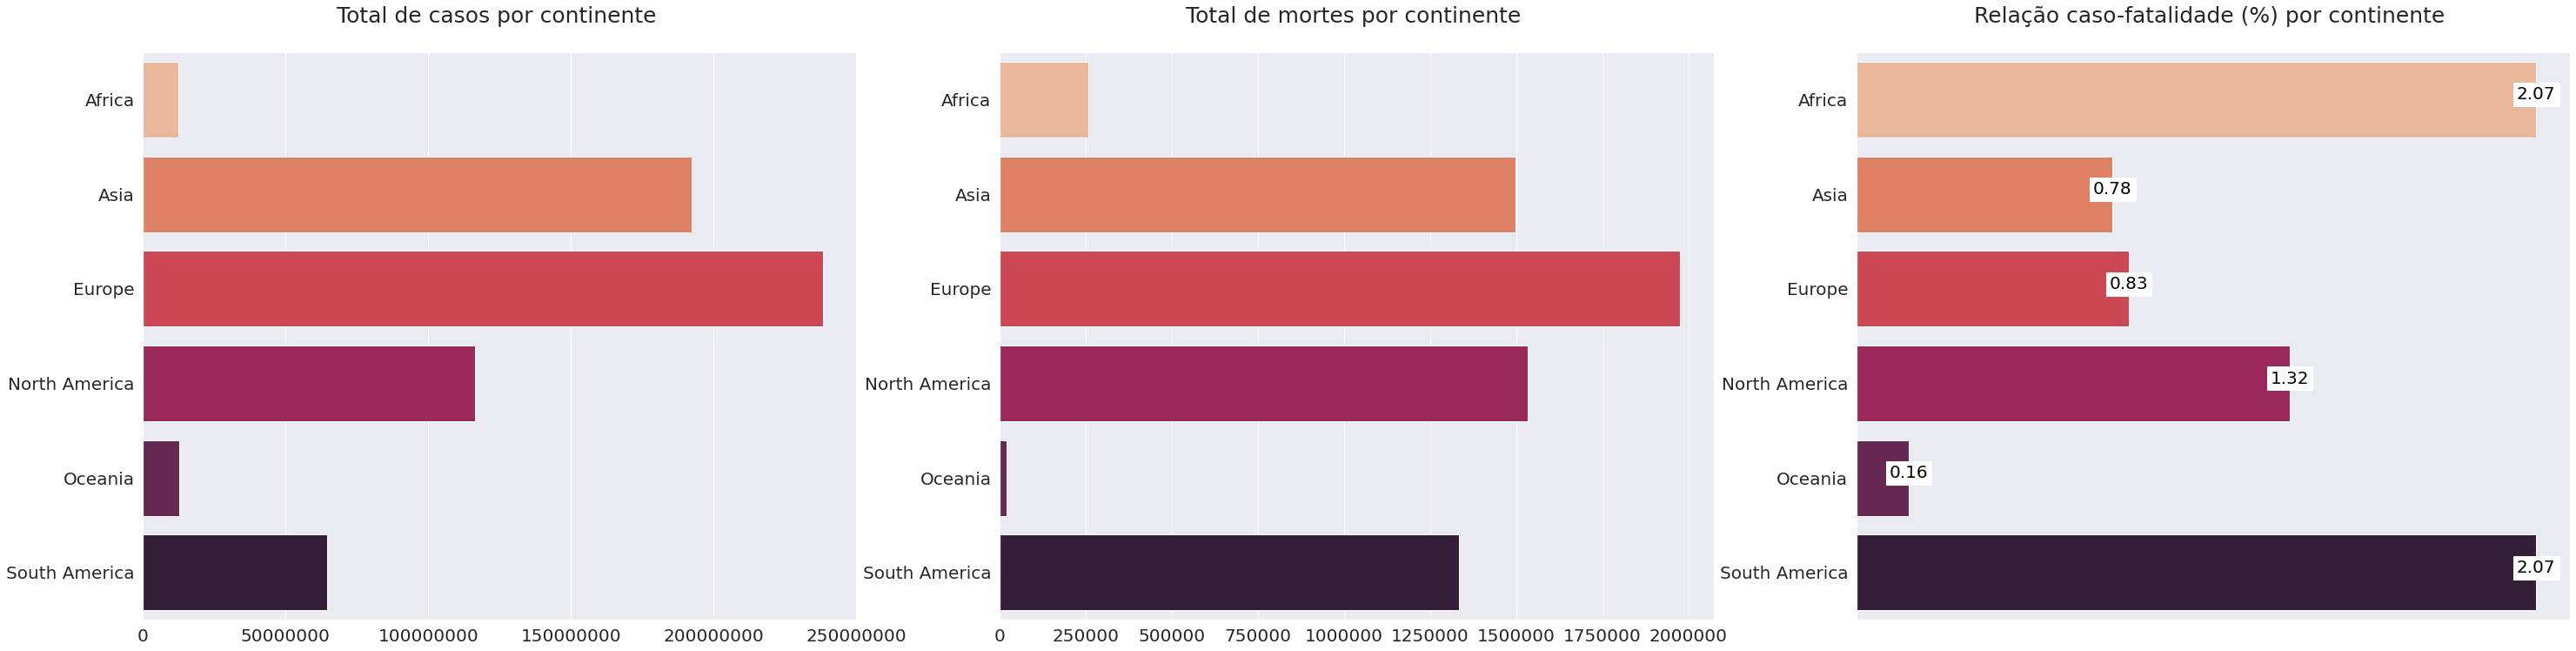

In [62]:
#Gráficos
sns.set_theme(style = "dark")
fig, ax = plt.subplots(1, 3, figsize = (50,12))

ax[0].ticklabel_format(style='plain') #remover notação científica
ax[1].ticklabel_format(style='plain') #remover notação científica
ax[2].ticklabel_format(style='plain') #remover notação científica

ax[0].set_title('Total de casos por continente \n', fontsize = 25)
ax[0] = sns.barplot(data = df_continents, x = df_continents['total_cases'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[0])
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis ='x', labelsize= 20)
ax[0].tick_params(axis ='y', labelsize= 20)
ax[0].xaxis.grid()

ax[1].set_title('Total de mortes por continente \n', fontsize = 25)
ax[1] = sns.barplot(data = df_continents, x = df_continents['total_deaths'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[1])
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis ='x', labelsize= 20)
ax[1].tick_params(axis ='y', labelsize= 20)
ax[1].xaxis.grid()

ax[2].set_title('Relação caso-fatalidade (%) por continente \n', fontsize = 25)
ax[2] = sns.barplot(data = df_continents, x = df_continents['case_fatality_ratio'], y = df_continents['continent'], palette = "rocket_r", ci = None, order = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'], ax = ax[2])
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].tick_params(axis ='y', labelsize= 20)

x_axis = ax[2].axes.get_xaxis()
x_axis.set_visible(False)

for p in ax[2].patches:
  _x = p.get_x() + p.get_width() 
  _y = p.get_y() + p.get_height() / 2
  value = float(p.get_width())
  ax[2].text(_x, _y, value, ha = "center",
  fontsize = 20,
  color = 'black',
  backgroundcolor = 'white')

plt.show()

In [21]:
#Tabela resumo
df_continents[['total_cases', 'total_deaths', 'total_vaccinations', 'case_fatality_ratio']].applymap(lambda x: "{:,}".format(x))

,total_cases,total_deaths,total_vaccinations,case_fatality_ratio
0,"12,405,758","257,297","680,640,018",2.07
1,"192,398,183","1,498,557","8,793,026,458",0.78
2,"238,310,039","1,973,840","1,348,062,688",0.83
3,"116,352,373","1,532,978","1,109,354,124",1.32
4,"12,841,697","20,951","80,378,691",0.16
5,"64,576,191","1,333,861","930,451,509",2.07


# **Ranking com os 10 países que apresentaram mais mortes por covid-19, em termos absolutos e relativos**

<h3>Encontrar o número de mortes por país, em termos absolutos</h3>

In [38]:
df.groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10)

location
World                  6617499
High income            2727934
Upper middle income    2500835
Europe                 1973840
North America          1532978
Asia                   1498557
Lower middle income    1340733
South America          1333861
European Union         1169825
United States          1076492
Name: total_deaths, dtype: int64

<h3>É necessário remover valores que não pertencem a um único país</h3>

In [39]:
#Remover valores que não pertencem a um único país e visualizar o ranking
df_ranking = df.loc[df.location.isin(['High income', 'Asia', 'Upper middle income', 'Europe', 'Africa', 'North America', 'Lower middle income', 'South America', 'European Union','Oceania', 'Low income', 'International', 'Micronesia (country)']) == False] 
deaths_vAbsolute = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['total_deaths'].max().sort_values(ascending = False).head(10).map('{:0,.0f}'.format)
deaths_vAbsolute = pd.DataFrame(deaths_vAbsolute)
deaths_vAbsolute

,total_deaths
location,
United States,"1,076,492"
Brazil,"688,835"
India,"530,553"
Russia,"383,381"
Mexico,"330,444"
Peru,"217,294"
United Kingdom,"211,346"
Italy,"179,985"
Indonesia,"159,291"


<h3>Encontrar os 10 países que tiveram os maiores percentuais de mortes por covid-19 no mundo</h3>


In [40]:
#Selecionar valores para realizar o cálculo do valor percentual do total de mortes
world = df_ranking[['location', 'total_deaths']].loc[df_ranking.location == 'World'].max()

countries = df_ranking[['location', 'total_deaths']].loc[df_ranking.location != 'World'].groupby('location').max()

In [41]:
#Visualizar o ranking
percent_deaths = (countries.total_deaths/world.total_deaths).sort_values(ascending = False).head(10)
percent_deaths = pd.DataFrame(percent_deaths).rename(columns = {'total_deaths': '%total_deaths'})
percent_deaths["rank_total_deaths"] = percent_deaths['%total_deaths'].rank(ascending = False).map('{:0,.0f}'.format)
percent_deaths["%total_deaths"] = percent_deaths['%total_deaths'].map('{:0,.2%}'.format)
percent_deaths

,%total_deaths,rank_total_deaths
location,,
United States,16.27%,1
Brazil,10.41%,2
India,8.02%,3
Russia,5.79%,4
Mexico,4.99%,5
Peru,3.28%,6
United Kingdom,3.19%,7
Italy,2.72%,8
Indonesia,2.41%,9


<h3>Ranquear os países mais populosos do mundo</h3>


In [42]:
rank_population = df_ranking.loc[df_ranking.location != 'World'].groupby('location')['population'].max().sort_values(ascending = False)
rank_population = pd.DataFrame(rank_population)
rank_population["population_rank"] = rank_population['population'].rank(ascending = False).map('{:0,.0f}'.format)
rank_population['population'] = rank_population['population'].map('{:0,.0f}'.format)
rank_population.head(10)

,population,population_rank
location,,
China,"1,425,887,360",1
India,"1,417,173,120",2
United States,"338,289,856",3
Indonesia,"275,501,344",4
Pakistan,"235,824,864",5
Nigeria,"218,541,216",6
Brazil,"215,313,504",7
Bangladesh,"171,186,368",8
Russia,"144,713,312",9


<h2>Tabela final</h2>

In [43]:
tb_final = deaths_vAbsolute.merge(percent_deaths, on = 'location').merge(rank_population['population_rank'], on = 'location')
tb_final

,total_deaths,%total_deaths,rank_total_deaths,population_rank
location,,,,
United States,"1,076,492",16.27%,1,3
Brazil,"688,835",10.41%,2,7
India,"530,553",8.02%,3,2
Russia,"383,381",5.79%,4,9
Mexico,"330,444",4.99%,5,10
Peru,"217,294",3.28%,6,44
United Kingdom,"211,346",3.19%,7,22
Italy,"179,985",2.72%,8,25
Indonesia,"159,291",2.41%,9,4


In [63]:
#Selecionar os dados do percentual do total de mortes
dados_barplot = ((countries.total_deaths/world.total_deaths)* 100).sort_values(ascending = False).round(2).head(10)
dados_barplot = pd.DataFrame(dados_plot).rename(columns = {'total_deaths': '%total_deaths'})

#Gráfico
fig = px.bar(x = dados_barplot.index, y = dados_barplot['%total_deaths'], color = dados_barplot['%total_deaths'], color_continuous_scale = 'Bluered', text_auto = '.2f')

fig.update_coloraxes(colorbar_title_text = "")
fig.update_traces(textfont_size = 14, textangle = 0, textposition = "outside")
fig.update_yaxes(visible = True, showticklabels = False)


fig.update_layout(
    title = "Ranking dos 10 países com o maior % do total de mortes por Covid-19 no mundo \n",
    xaxis_title = None,
    yaxis_title = "Percentual mortes (%)",
    font = dict(size=14)
        )
fig.update_layout(title_font_size = 22)

fig.show()

## Ranking com os 10 países que apresentaram mais mortes por covid-19 a cada  milhão de habitantes

Obs: sistema de separação de milhar em inglês

In [ ]:
deaths_per_million = df_ranking.groupby('location')['total_deaths_per_million'].max().sort_values(ascending = False).head(10).map('{:0,.0f}'.format)
deaths_per_million = pd.DataFrame(deaths_per_million)
deaths_per_million

,total_deaths_per_million
location,
Peru,"6,382"
Bulgaria,"5,600"
Bosnia and Herzegovina,"5,007"
Hungary,"4,834"
North Macedonia,"4,568"
Georgia,"4,517"
Montenegro,"4,446"
Croatia,"4,279"
Czechia,"3,977"


# **Ranking com os 10 países que apresentaram maior relação caso-fatalidade**

In [ ]:
#Selecionar o último valor informado por cada país
case_fatality_ratio = df_ranking.groupby('location')[['total_cases', 'total_deaths']].max()
case_fatality_ratio = case_fatality_ratio.loc[(case_fatality_ratio['total_cases'] != 0) & (case_fatality_ratio['total_deaths'] != 0)] #Mantém apenas os países que possuem registos para número de casos ou de mortes

In [ ]:
case_fatality_ratio = df_ranking.groupby('location')[['total_cases', 'total_deaths']].max()
case_fatality_ratio['case_fatality_ratio'] = round((case_fatality_ratio['total_deaths']/case_fatality_ratio['total_cases']) * 100, 2)
case_fatality_ratio['case_fatality_ratio'].sort_values(ascending = False).head(10)

location
Yemen                     18.07
Sudan                      7.83
Syria                      5.51
Peru                       5.20
Somalia                    4.99
Egypt                      4.81
Mexico                     4.64
Bosnia and Herzegovina     4.04
Afghanistan                3.82
Liberia                    3.67
Name: case_fatality_ratio, dtype: float64

## **Números da vacinação**

<h3>Números da vacinação por continente</h3>

In [ ]:
data_vaccination = df[['location','total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
                       'people_fully_vaccinated_per_hundred']].loc[df.location.isin(['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania'])]

df_vaccination = data_vaccination.groupby('location')[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 
                                                       'people_fully_vaccinated_per_hundred']].max().sort_values(by = 'location').applymap(lambda x: "{:,}".format(x))
df_vaccination

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred
location,,,,,,
Africa,"680,631,049","441,619,343","354,313,230",47.71,30.95,24.83
Asia,"8,792,467,840","3,624,827,643","3,399,103,982",186.23,76.77,71.99
Europe,"1,347,590,350","520,097,624","497,422,919",180.93,69.83,66.79
North America,"1,108,973,593","453,648,188","390,543,102",184.73,75.57,65.06
Oceania,"80,378,691","29,104,614","27,981,793",178.47,64.62,62.13
South America,"930,417,279","372,475,333","334,974,284",213.0,85.27,76.69


<h3>Ranking com os 10 países que tiveram o maior número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [ ]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = False).head(10)

location
Gibraltar               126.76
Qatar                   105.68
United Arab Emirates    103.72
Brunei                   99.26
Singapore                90.90
Chile                    90.24
Hong Kong                90.07
China                    89.22
Cuba                     89.19
Malta                    88.35
Name: people_fully_vaccinated_per_hundred, dtype: float64

<h3>Ranking com os 10 países que tiveram o menor número de pessoas totalmente vacinadas a cada 100 habitantes</h3>

In [ ]:
df_ranking.groupby('location')['people_fully_vaccinated_per_hundred'].max().sort_values(ascending = True).head(10)

location
Burundi                         0.18
Yemen                           2.01
Haiti                           2.04
Papua New Guinea                2.95
Democratic Republic of Congo    3.76
Cameroon                        4.61
Madagascar                      5.91
Senegal                         7.29
Syria                           9.51
Mali                            9.56
Name: people_fully_vaccinated_per_hundred, dtype: float64